In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.ephys.ephys_extractor import EphysSweepFeatureExtractor

In [137]:
ctc = CellTypesCache()
cell_specimen_id = 569860147 # aspiny
data_set = ctc.get_ephys_data(cell_specimen_id)

sweeps = ctc.get_ephys_sweeps(cell_specimen_id)
sweep_number = [x['sweep_number'] for x in sweeps
                      if x['stimulus_name'] in ['Short Square'] and x['num_spikes'] is not None]
sweep_data = data_set.get_sweep(sweep_number[0])

index_range = sweep_data["index_range"]
i = sweep_data["stimulus"][0:index_range[1]+1] * 1e12
v = sweep_data["response"][0:index_range[1]+1] * 1e3

sampling_rate = sweep_data["sampling_rate"]
print(sampling_rate)
t = np.arange(0, len(v)) * (1.0 / sampling_rate)

sweep_ext = EphysSweepFeatureExtractor(t=t, v=v, i=i)
sweep_ext.process_spikes()
result = {}
for key in sweep_ext.spike_feature_keys():
    try:
        result[key] = sweep_ext.spike_feature(key)
    except TypeError:
        print("No valid Key")

# TODO add delay features, how long from stimuli to response?
ephys_data = pd.DataFrame.from_dict(result)
print(ephys_data)

50000.0
   threshold_index  clipped  threshold_t  threshold_v  threshold_i  \
0            51118    False      1.02236   -49.718754        200.0   

   peak_index   peak_t     peak_v  peak_i  trough_index  ...  adp_index  \
0       51144  1.02288  49.562504   200.0         53324  ...        NaN   

   adp_t  adp_v  adp_i  slow_trough_index  slow_trough_t  slow_trough_v  \
0    NaN    NaN    NaN                NaN            NaN            NaN   

   slow_trough_i    width  upstroke_downstroke_ratio  
0            NaN  0.00094                    4.38404  

[1 rows x 36 columns]


Text(0, 0.5, 'pA')

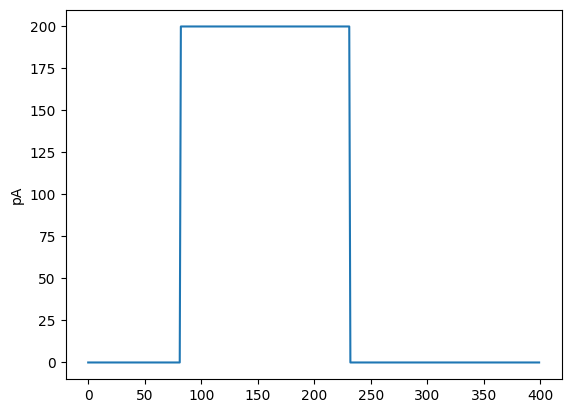

In [138]:
buffer = 200
index = ephys_data['threshold_index'][0]
stimuli = i[index-buffer:index+buffer]
plt.plot(stimuli)
plt.ylabel('pA')

Text(0, 0.5, 'mV')

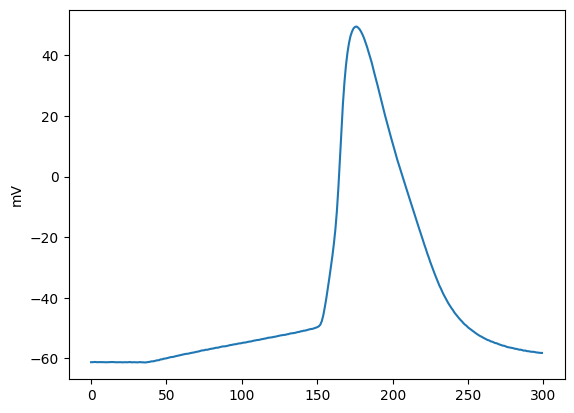

In [139]:
buffer = 150
response = v[index-buffer:index+buffer]
plt.plot(response)
plt.ylabel('mV')

Text(0.5, 0, 'Frequency')

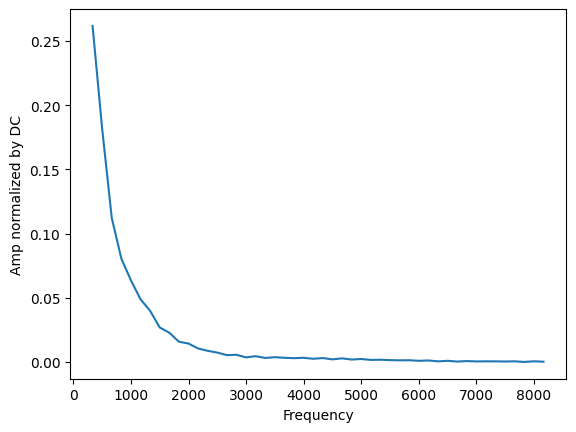

In [140]:
fft = np.fft.fft(response)
fft = fft / fft[0]
freq = np.fft.fftfreq(response.size, d=1./sampling_rate)
plt.plot(freq[2:50], np.abs(fft[2:50]))
plt.ylabel('Amp normalized by DC')
plt.xlabel('Frequency')

In [141]:
ctc = CellTypesCache()
cell_specimen_id = 571520908 # spiny
data_set = ctc.get_ephys_data(cell_specimen_id)

sweeps = ctc.get_ephys_sweeps(cell_specimen_id)
sweep_number = [x['sweep_number'] for x in sweeps
                      if x['stimulus_name'] in ['Short Square'] and x['num_spikes'] is not None]
sweep_data = data_set.get_sweep(sweep_number[0])

index_range = sweep_data["index_range"]
i = sweep_data["stimulus"][0:index_range[1]+1] * 1e12
v = sweep_data["response"][0:index_range[1]+1] * 1e3

sampling_rate = sweep_data["sampling_rate"]
print(sampling_rate)
t = np.arange(0, len(v)) * (1.0 / sampling_rate)

sweep_ext = EphysSweepFeatureExtractor(t=t, v=v, i=i)
sweep_ext.process_spikes()
result = {}
for key in sweep_ext.spike_feature_keys():
    try:
        result[key] = sweep_ext.spike_feature(key)
    except TypeError:
        print("No valid Key")

# TODO add delay features, how long from stimuli to response?
ephys_data = pd.DataFrame.from_dict(result)

50000.0


Text(0, 0.5, 'pA')

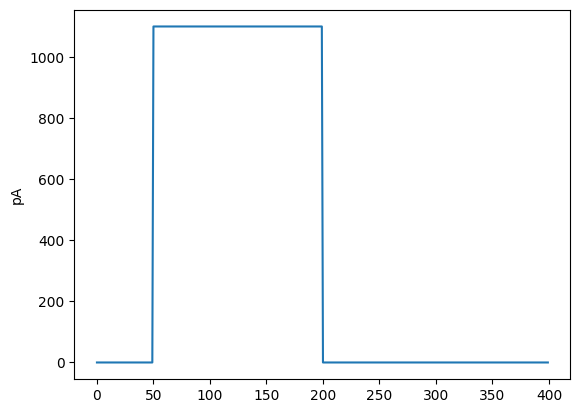

In [142]:
buffer = 200
index = ephys_data['threshold_index'][0]
stimuli = i[index-buffer:index+buffer]
plt.plot(stimuli)
plt.ylabel('pA')

Text(0, 0.5, 'mV')

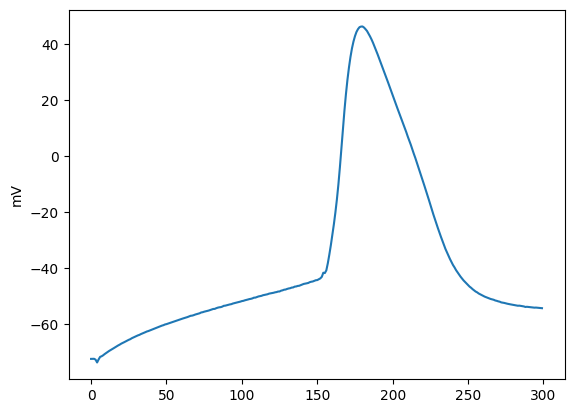

In [143]:
buffer = 150
response = v[index-buffer:index+buffer]
plt.plot(response)
plt.ylabel('mV')

Text(0.5, 0, 'Frequency')

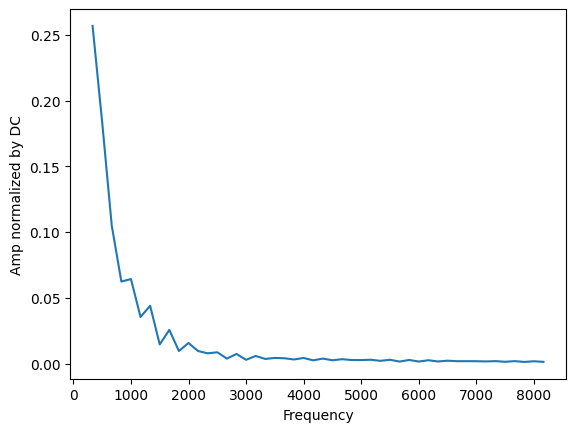

In [144]:
fft = np.fft.fft(response)
fft = fft / fft[0]
freq = np.fft.fftfreq(response.size, d=1./sampling_rate)
plt.plot(freq[2:50], np.abs(fft[2:50]))
plt.ylabel('Amp normalized by DC')
plt.xlabel('Frequency')

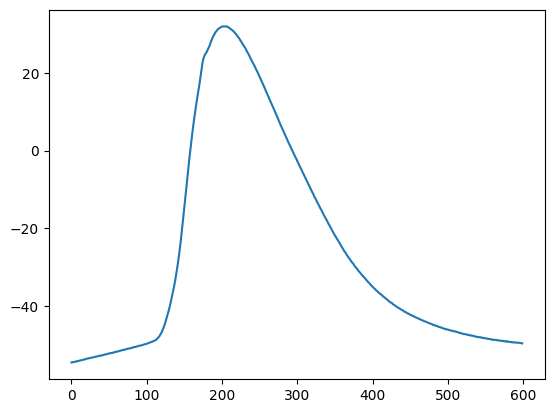

In [145]:
signal = np.load('data/single_spike/mouse/glutamatergic/479091820_16.npy')
plt.plot(signal)

Text(0.5, 0, 'Frequency')

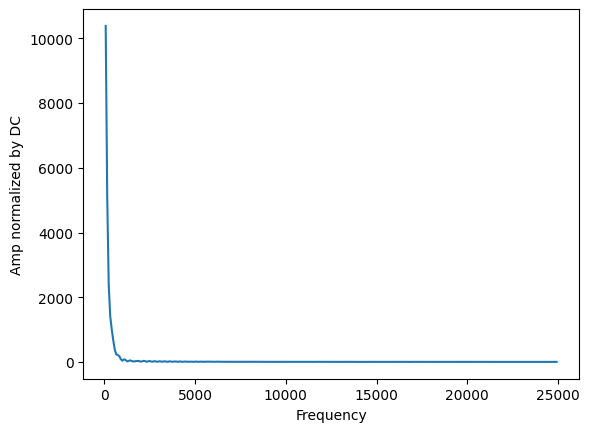

In [146]:
fft = np.fft.fft(signal)
freq = np.fft.fftfreq(signal.size, d=1./sampling_rate)
max_freq = int(freq.size/2)
plt.plot((freq[1:max_freq]), np.abs(fft[1:max_freq]))
plt.ylabel('Amp normalized by DC')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

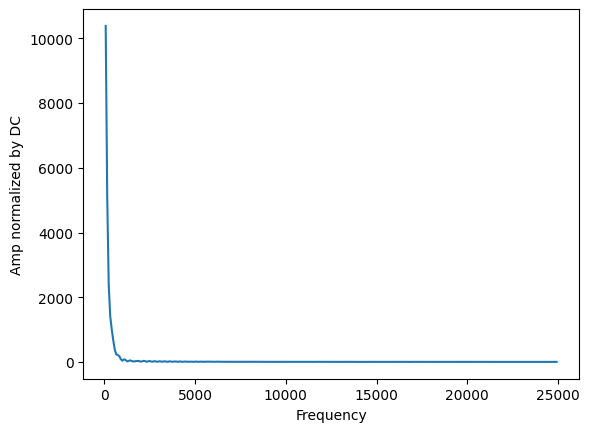

In [147]:
fft1 = np.load('data/single_spike_fft/mouse/glutamatergic/479091820_16.npy')
freq = np.fft.fftfreq(signal.size, d=1./sampling_rate)
max_freq = int(freq.size/2)
plt.plot((freq[1:max_freq]), np.abs(fft1[1:max_freq]))
plt.ylabel('Amp normalized by DC')
plt.xlabel('Frequency')

In [148]:
print(np.sum(np.real(fft)-np.real(fft1)))

0.0


In [149]:
print(np.sum(np.imag(fft)-np.imag(fft1)))

0.0
